In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Tu dajemy nasze paths do wynikow
paths = ["../results/wyniki_bb/Abalone_1.csv",
         "../results/wyniki_bb/Appliances_Energy_Prediction_374.csv",
         "../results/wyniki_bb/Combined_Cycle_Power_Plant_294.csv",
         "../results/wyniki_bb/Energy_Efficiency_242.csv",
         "../results/wyniki_bb/Student_Performance_320.csv",
         "../results/wyniki_bb/Wine_Quality_186.csv",
        ]
dataset_dict = {"../test_data\Abalone_1_preprocessed.csv":'Abalone',
         "../test_data\Appliances_Energy_Prediction_374_preprocessed_cut.csv":'Appliances_Energy_Prediction',
         "../test_data\Combined_Cycle_Power_Plant_294_preprocessed.csv":'Combined_Cycle_Power_Plant',
         "../test_data\Energy_Efficiency_242_preprocessed.csv":'Energy_Efficiency',
         "../test_data\Student_Performance_320_preprocessed.csv":'Student_Performance',
         "../test_data\Wine_Quality_186_preprocessed.csv":'Wine_Quality',
        }
dfs = []
for path in paths:
    dfs.append(pd.read_csv(path))
result = pd.concat(dfs)

In [34]:
datasets = result["dataset"].unique()
rates = result["bootstrap_rate"].unique()
rfs = result["rf"].unique()

In [35]:
# for dataset in datasets:
#     plt.figure(figsize=(10, 10))
#     df = result[result["dataset"] == dataset]
#     # match = re.search(r'([^/]+?)_processed\.csv$', dataset)
#     # if match:
#     #     dataset_name = match.group(1)
#     # print(dataset)
#     for rf in rfs:
#         df_rf = df[df["rf"] == rf]
#         arr = []
#         for rate in rates:
#             y = df_rf[df_rf["bootstrap_rate"] == rate]["mean_mse"]
#             arr.append(y)
#         plt.plot(np.float64(rates), arr, label = f"{rf}")
#     plt.xlabel("Bootstrap rate")
#     plt.ylabel("Mean CV MSE")
#     plt.title(f"MSE(br) for dataset {dataset_dict[dataset]}")
#     plt.legend()
#     plt.show()

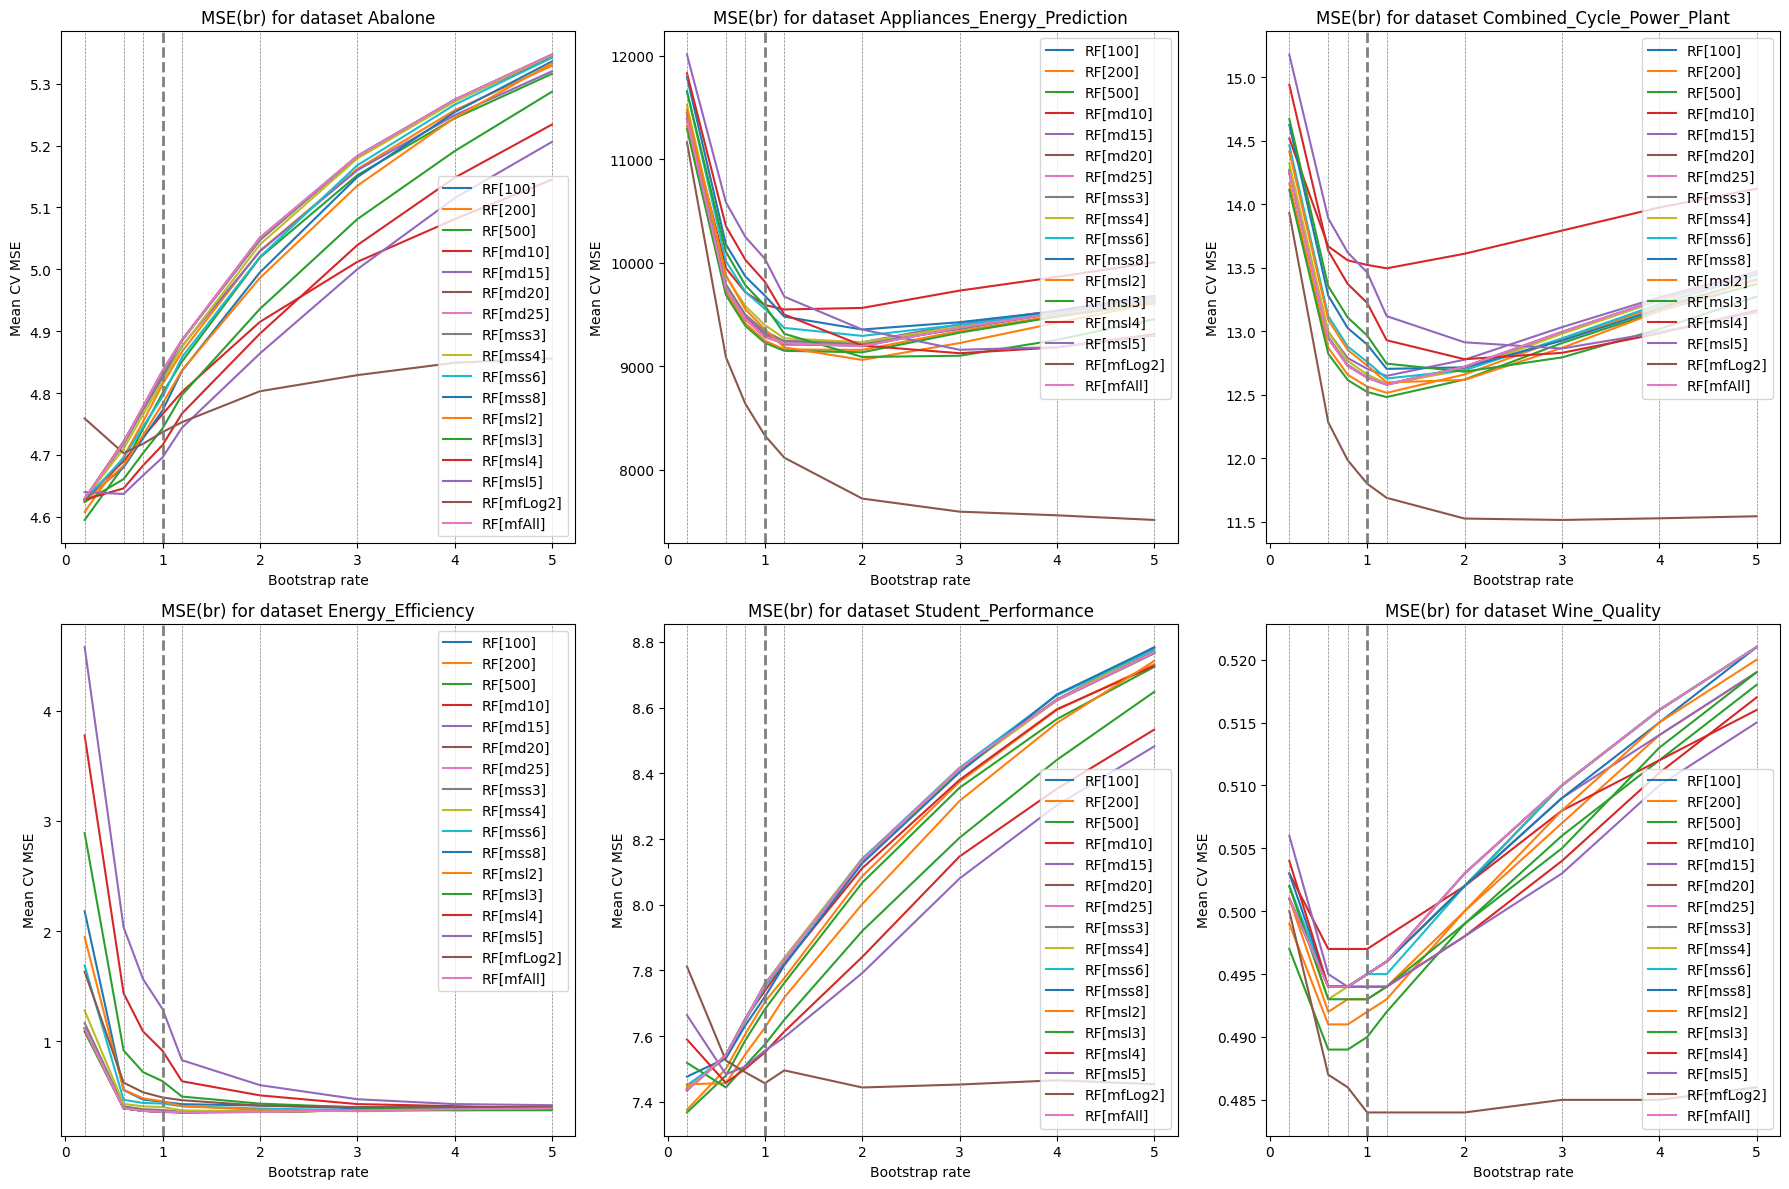

In [37]:


# Define the vertical line positions
max_samples = [0.2, 0.6, 0.8, 1, 1.2, 2, 3, 4, 5]

# Create 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily index

for i, dataset in enumerate(datasets):
    if i >= 6:  # Only plot first 6 datasets
        break
    ax = axes[i]
    df = result[result["dataset"] == dataset]

    for rf in rfs:
        df_rf = df[df["rf"] == rf]
        arr = []
        for rate in rates:
            y = df_rf[df_rf["bootstrap_rate"] == rate]["mean_mse"]
            arr.append(y)
        ax.plot(np.float64(rates), arr, label=f"{rf}")

    # Add vertical lines at max_samples
    for ms in max_samples:
        if ms == 1:
            ax.axvline(x=ms, color='gray', linestyle='--', linewidth=2)  # Thicker line at x=1
        else:
            ax.axvline(x=ms, color='gray', linestyle='--', linewidth=0.5)  # Thin lines elsewhere

    ax.set_title(f"MSE(br) for dataset {dataset_dict[dataset]}")
    ax.set_xlabel("Bootstrap rate")
    ax.set_ylabel("Mean CV MSE")
    ax.legend()

# Remove any unused subplots
for j in range(i+1, 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
